# Darts 

<Axes: xlabel='Date'>

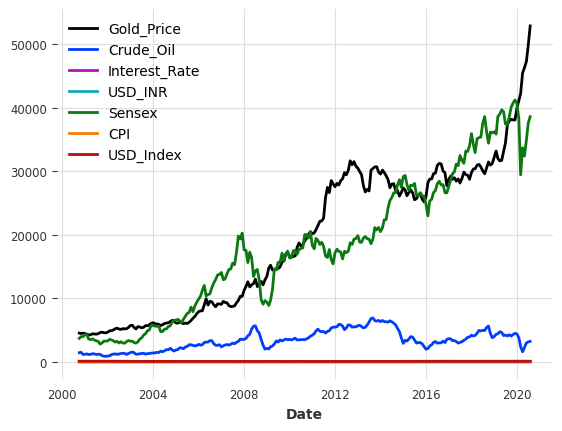

In [1]:
import pandas as pd
from darts import TimeSeries

df = pd.read_csv('GoldUP.csv')

# Assuming 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Specify 'Date' as the time_col and other relevant columns as value_cols
time_col = 'Date'
value_cols = ['Gold_Price', 'Crude_Oil', 'Interest_Rate', 'USD_INR', 'Sensex', 'CPI', 'USD_Index']

# Create a TimeSeries using the specified time_col and value_cols
series = TimeSeries.from_dataframe(df, time_col=time_col, value_cols=value_cols)

# Plot the TimeSeries
series.plot()


In [2]:
# Display the first few rows of the TimeSeries
print(series.head())

<TimeSeries (DataArray) (Date: 5, component: 7, sample: 1)>
array([[[4538.      ],
        [1455.51    ],
        [   8.      ],
        [  46.318297],
        [3711.02    ],
        [  37.23    ],
        [ 116.65    ]],

       [[4483.      ],
        [1512.47    ],
        [   8.      ],
        [  46.783613],
        [3997.99    ],
        [  37.31    ],
        [ 115.24    ]],

       [[4541.      ],
        [1178.11    ],
        [   8.      ],
        [  46.745856],
        [3972.12    ],
        [  36.98    ],
        [ 109.56    ]],

       [[4466.      ],
        [1208.18    ],
        [   8.      ],
        [  46.536033],
        [4326.72    ],
        [  36.9     ],
        [ 110.52    ]],

       [[4370.      ],
        [1267.18    ],
        [   7.5     ],
        [  46.514595],
        [4247.04    ],
        [  36.73    ],
        [ 112.01    ]]])
Coordinates:
  * Date       (Date) datetime64[ns] 2000-10-01 2000-11-01 ... 2001-02-01
  * component  (component) object 'Gol

In [3]:
from darts.models import XGBModel

# Split the time series into training and validation sets
train_size = int(len(series) * 0.7)
train, val = series[:train_size], series[train_size:]

# Specify the target column for prediction
target_column = 'Gold_Price'
cov_columns = ['Crude_Oil', 'Interest_Rate', 'USD_INR', 'Sensex', 'CPI', 'USD_Index']

# definetarget variable to train on
target = train[target_column]

# optionally, use past observed rainfall (pretending to be unknown beyond index 100)
past_cov = train[cov_columns]


# predict 48 values using the 12 past values of all covariates

model = XGBModel(
    lags=6,
    lags_past_covariates=6,
    output_chunk_length=3,
)

model.fit(target, past_covariates=past_cov)
pred = model.predict(3)

c:\Users\Paul\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsforecast\core.py:26: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


In [4]:
pred.values()
len(pred.values())

3

In [5]:
len(val)

72

<Axes: xlabel='Date'>

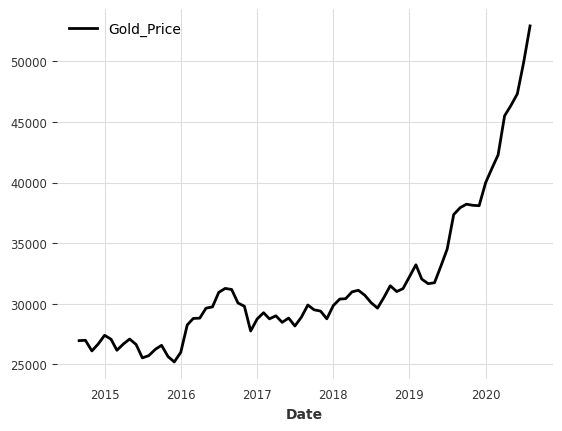

In [6]:
val[target_column].plot()

<Axes: xlabel='Date'>

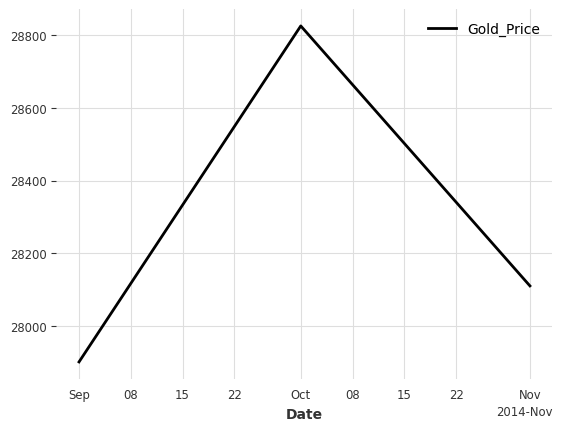

In [7]:
pred[:48].plot()

<Axes: xlabel='Date'>

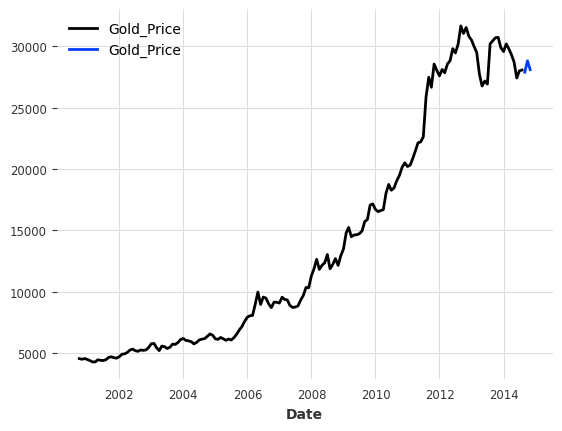

In [8]:
train[target_column].plot()
pred.plot()

<Axes: xlabel='Date'>

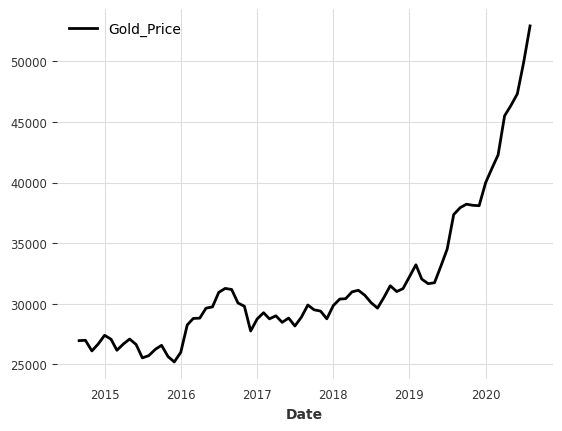

In [9]:
val[target_column].plot()

In [10]:
from darts.datasets import WeatherDataset
series = WeatherDataset().load()

# Split the time series into training and validation sets
train_size = int(len(series) * 0.7)
train, val = series[:train_size], series[train_size:]

# Specify the target column for prediction
target_column = 'Gold_Pri'
cov_columns = ['Crude_Oil', 'Interest_Rate', 'USD_INR', 'Sensex', 'CPI', 'USD_Index']

# definetarget variable to train on
target = train[target_column]

# optionally, use past observed rainfall (pretending to be unknown beyond index 100)
past_cov = train[cov_columns]


# predict 48 values using the 12 past values of all covariates

model = XGBModel(
    lags=6,
    lags_past_covariates=6,
    output_chunk_length=3,
)

model.fit(target, past_covariates=past_cov)
pred = model.predict(3)

KeyError: "not all values found in index 'component'"

<Axes: xlabel='Date Time'>

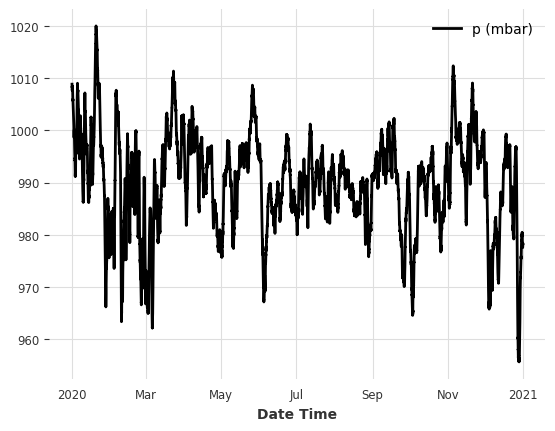

In [ ]:
series['p (mbar)'].plot()

<Axes: xlabel='Date Time'>

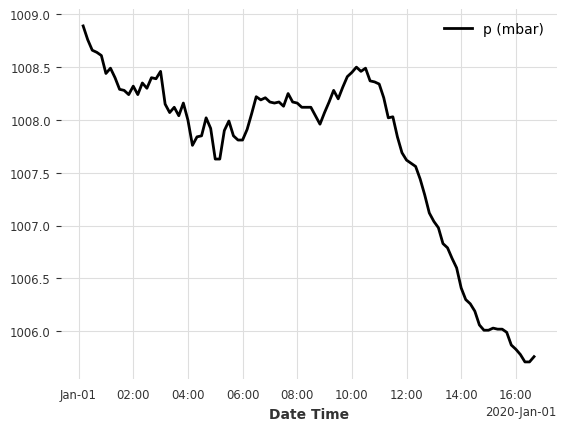

In [ ]:
target['p (mbar)'].plot()

In [11]:
print('test')

test
